In [1]:
def ini_draw(aH0=67.5,aombh2=0.022,aomch2=0.122,amnu=0.06,aomk=0,atau=0.06,aAs=2e-9,ans=0.965,ahalofit_version='mead',almax=3000):
    pars = camb.set_params(None, False,H0=aH0,ombh2=aombh2,omch2=aomch2,mnu=amnu,omk=aomk,tau=atau,As=aAs,ns=ans,halofit_version=ahalofit_version,lmax=almax)
    #pars = camb.set_params(H0=argH0, ombh2=argombh2, omch2=argomch2, mnu=argmnu, omk=argomk, tau=argtau, As,argAs, ns=argns, halofit_version=arghalofit_version,lmax=arglmax)
    results = camb.get_results(pars)
    powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
    totCL=powers['lensed_scalar']
    unlensedCL=powers['unlensed_scalar']
    totCL=powers['total']
    unlensedCL=powers['unlensed_scalar']
    print(totCL.shape)
    #Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
    #The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
    ls = np.arange(totCL.shape[0])
    fig, ax = plt.subplots(2,2, figsize = (12,12))
    ax[0,0].plot(ls,totCL[:,0], color='k')
    ax[0,0].plot(ls,unlensedCL[:,0], color='C2')
    ax[0,0].set_title(r'$TT\, [\mu K^2]$')
    ax[0,1].plot(ls[2:], 1-unlensedCL[2:,0]/totCL[2:,0]);
    ax[0,1].set_title(r'Fractional TT lensing')
    ax[1,0].plot(ls,totCL[:,1], color='k')
    ax[1,0].plot(ls,unlensedCL[:,1], color='C2')
    ax[1,0].set_title(r'$EE\, [\mu K^2]$')
    ax[1,1].plot(ls,totCL[:,3], color='k')
    ax[1,1].plot(ls,unlensedCL[:,3], color='C2')
    ax[1,1].set_title(r'$TE\, [\mu K^2]$');
    for ax in ax.reshape(-1): 
        ax.set_xlim([2,3000])
        ax.set_xlabel(r'$\ell$');

    return totCL[:,0],ls;

Using CAMB 1.5.4 installed at /home/andrea/Bureau/Rayleigh/VIR_1/CAMB/camb
(2751, 4)


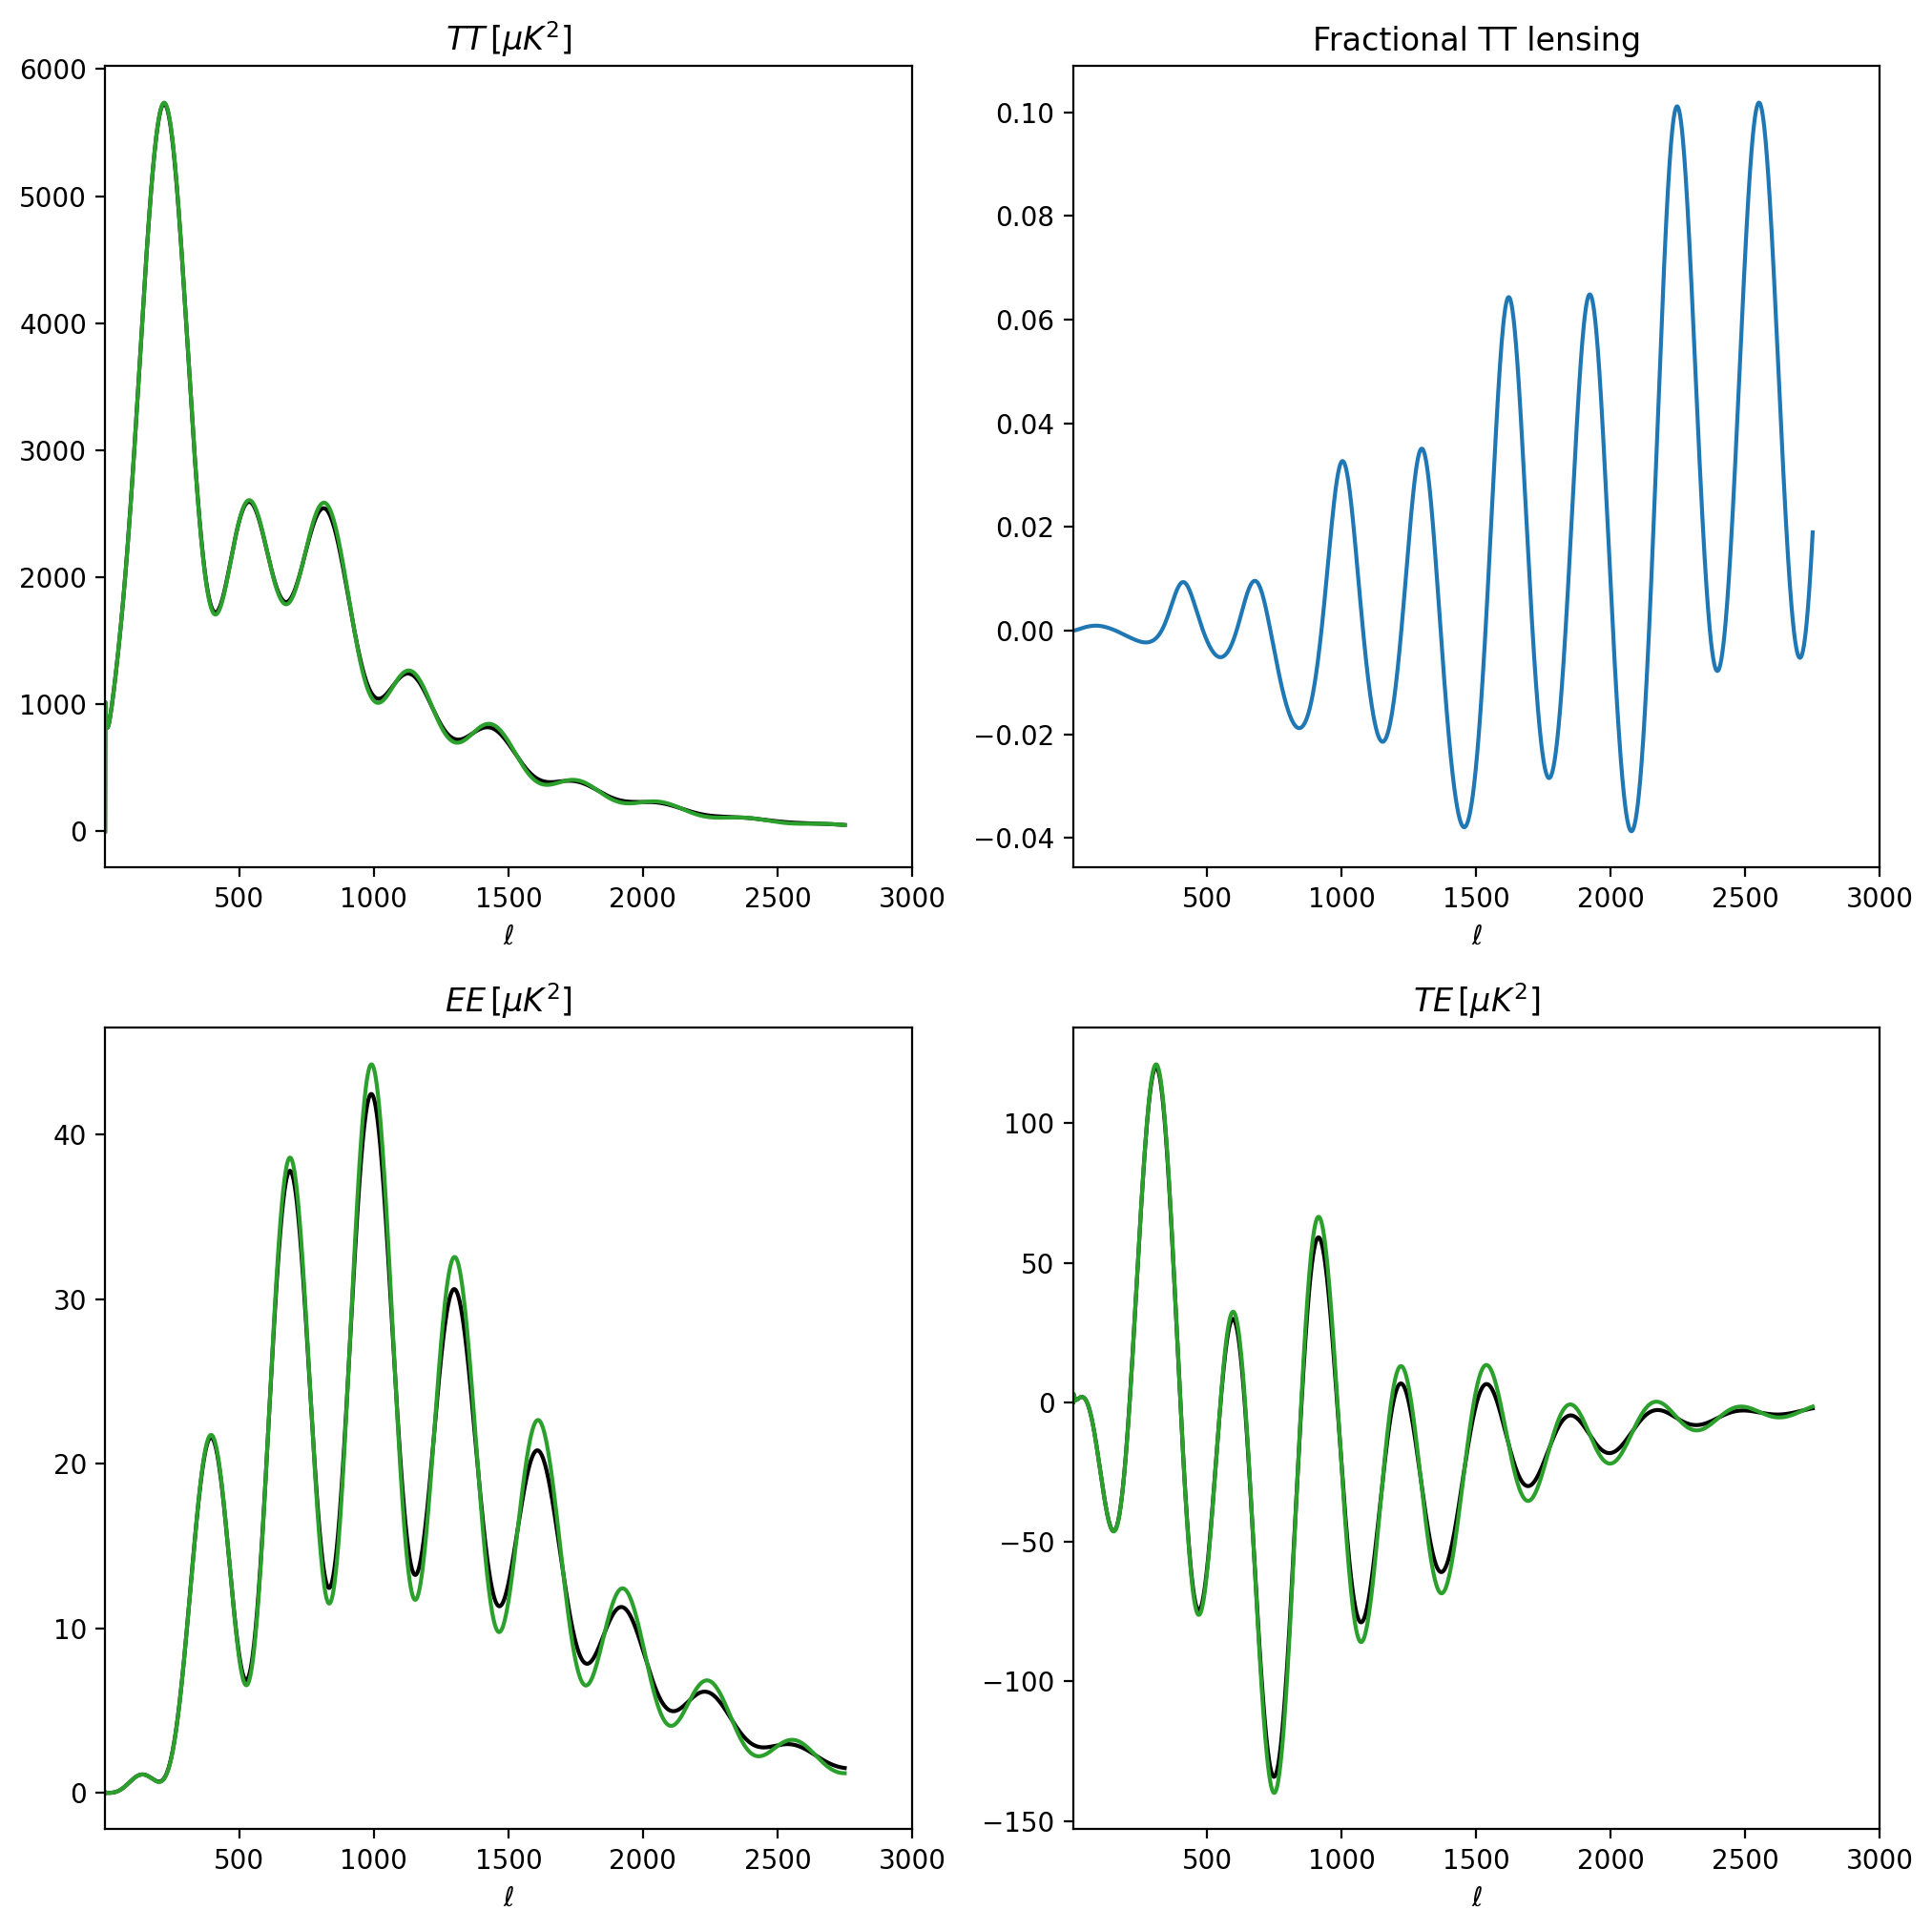

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))
# make sure the version and path is what you expect

Dltt,ls = ini_draw(67.32117,0.0223828,0.1201075,0.06,0,0.05430842,2.100549e-9,0.9660499,5,2700)

0.0308782
0.0396855
0.0344913
2698
2751
63.58917713893123
2.90216
1673.587044867417


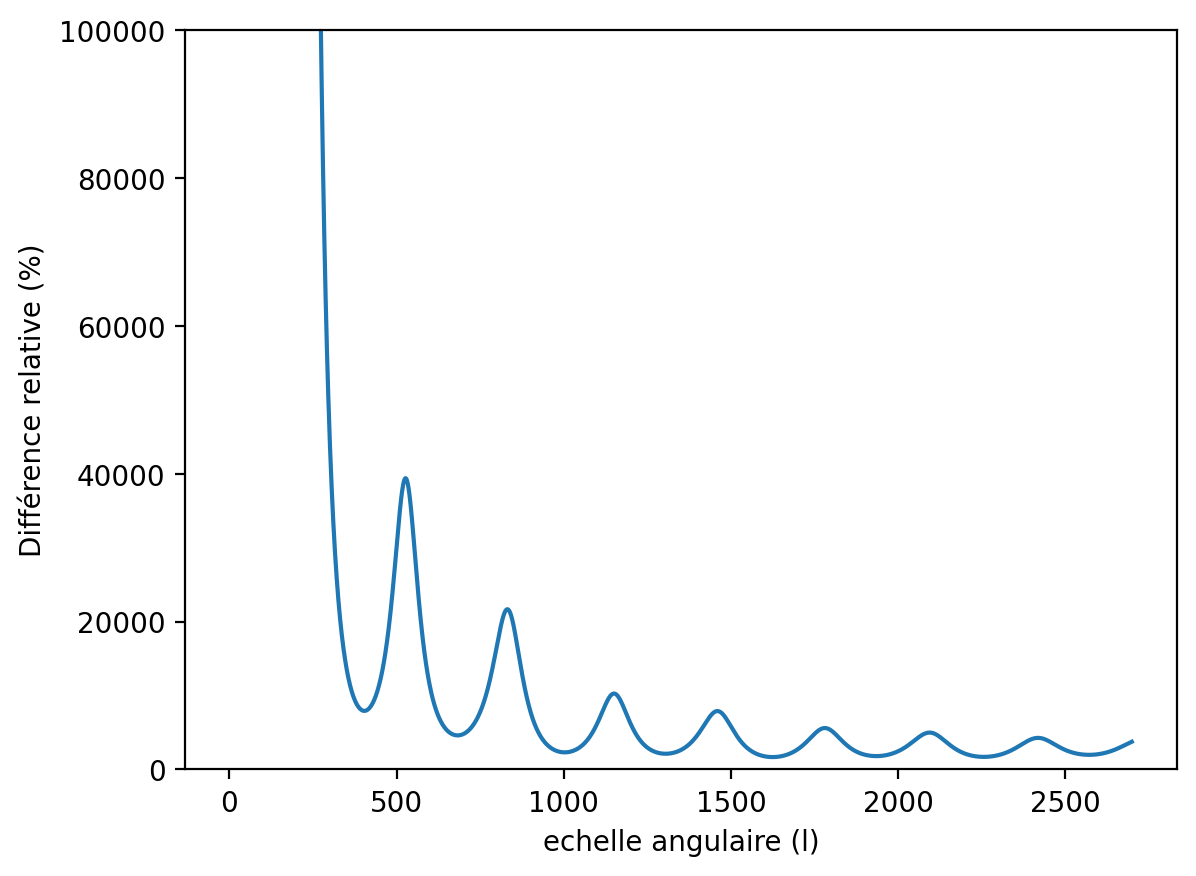

In [4]:
#lenspotential

file_path = 'planck_2018_scalCls.dat'
 
with open(file_path, 'r') as file:
    content = file.read()
#print(content)
liste = list(content.split())
for i in range(9):
    del liste[0]
#print(liste)


new_Dltt = []

for i in range(int((len(liste)+1)/6)):
    new_Dltt.append(float(liste[i*6]))

Dltt_c = Dltt[2:2700]
ls = ls[2:2700]


#print(ls)
print(new_Dltt[0])
print(new_Dltt[1])
print(new_Dltt[2])
print(len(new_Dltt))

Relativ_diff = []

for i in range(len(Dltt_c)):
    Relativ_diff.append((Dltt_c[i]-new_Dltt[i])/new_Dltt[i]*100)
    
    l = np.arange(2,2700)

plt.plot(l,Relativ_diff)
plt.ylabel('Différence relative (%)')
plt.xlabel('echelle angulaire (l)')
plt.ylim((0,100000))
plt.savefig('relative_diff')

print(len(Dltt))
print(Dltt[2600])
print(new_Dltt[2600])
print(np.min(Relativ_diff))

ValueError: x and y must have same first dimension, but have shapes (2698,) and (2696,)

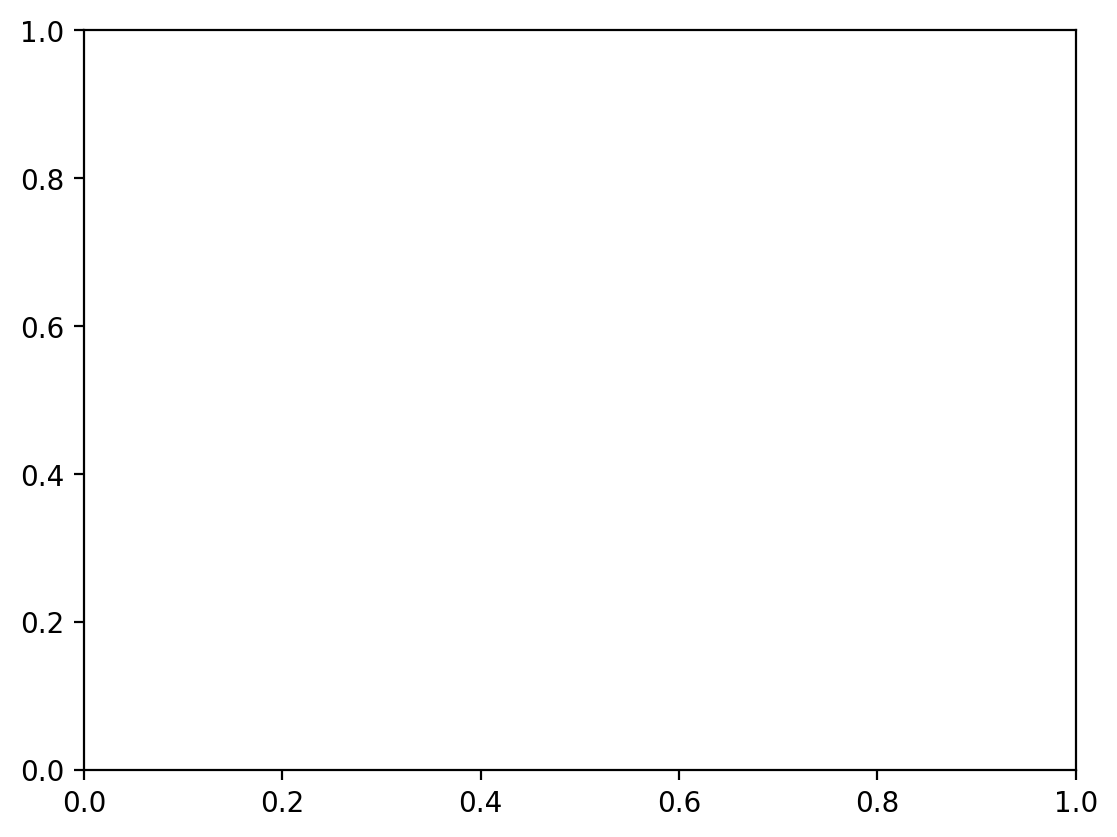

In [13]:
Relativ_diff = []

for i in range(len(Dltt)):
    Relativ_diff.append((Dltt[i]-new_Dltt[i])/new_Dltt[i]*100)
    
    l = np.arange(2,2700)

plt.plot(l,Relativ_diff)
plt.ylabel('Différence relative (%)')
plt.xlabel('echelle angulaire (l)')
plt.ylim((0.99,1.01))

plt.savefig('relative_diff')

print(len(Dltt))
print(Dltt[2600])
print(new_Dltt[2600])

0.0308782
0.0396855
0.0344913
2698


ValueError: x and y must have same first dimension, but have shapes (2698,) and (2696,)

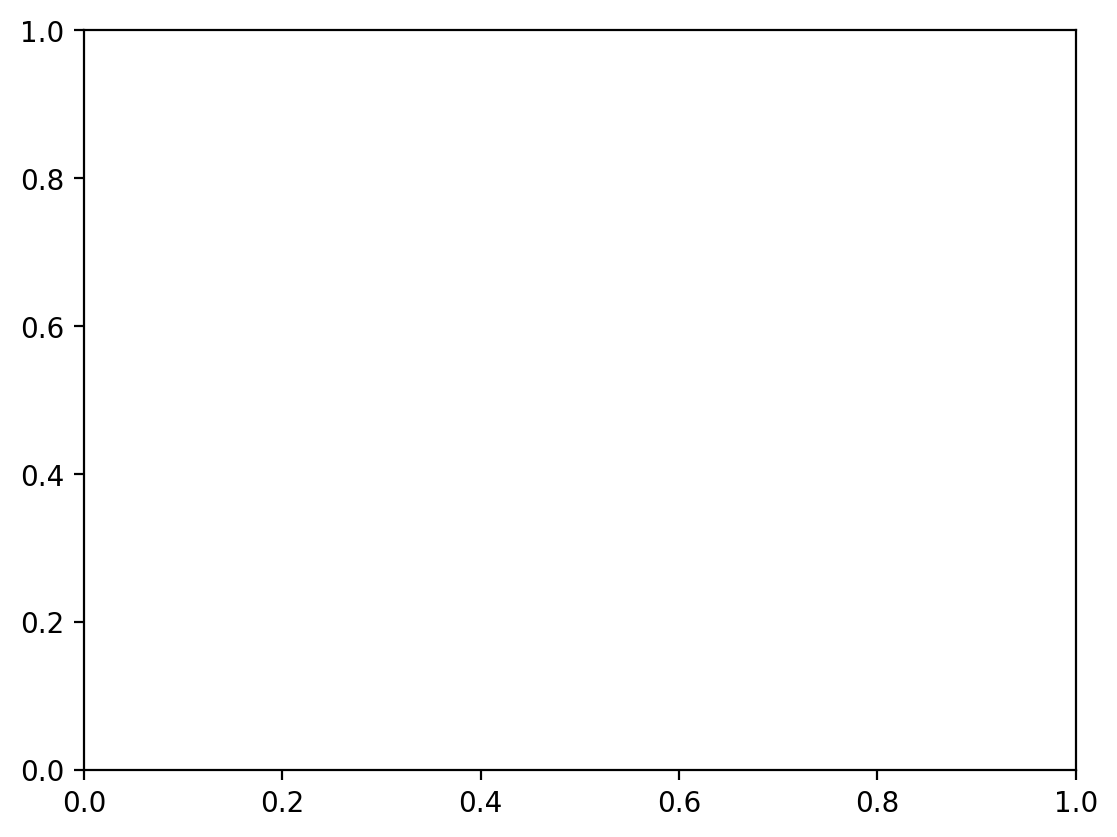

In [11]:
#lenspotential

file_path = 'CAMB/planck_2018_scalCls.dat'
 
with open(file_path, 'r') as file:
    content = file.read()
#print(content)
liste = list(content.split())
for i in range(9):
    del liste[0]
#print(liste)


new_Dltt = []

for i in range(int((len(liste)+1)/6)):
    new_Dltt.append(float(liste[i*6]))

Dltt = Dltt[2:2700]
ls = ls[2:2700]


#print(ls)
print(new_Dltt[0])
print(new_Dltt[1])
print(new_Dltt[2])
print(len(new_Dltt))

Relativ_diff = []

for i in range(len(Dltt)):
    Relativ_diff.append((Dltt[i]-new_Dltt[i])/new_Dltt[i]*100)
    
    l = np.arange(2,2700)

plt.plot(l,Relativ_diff)
plt.ylabel('Différence relative (%)')
plt.xlabel('echelle angulaire (l)')

plt.savefig('relative_diff')

print(len(Dltt))
print(Dltt[2600])
print(new_Dltt[2600])

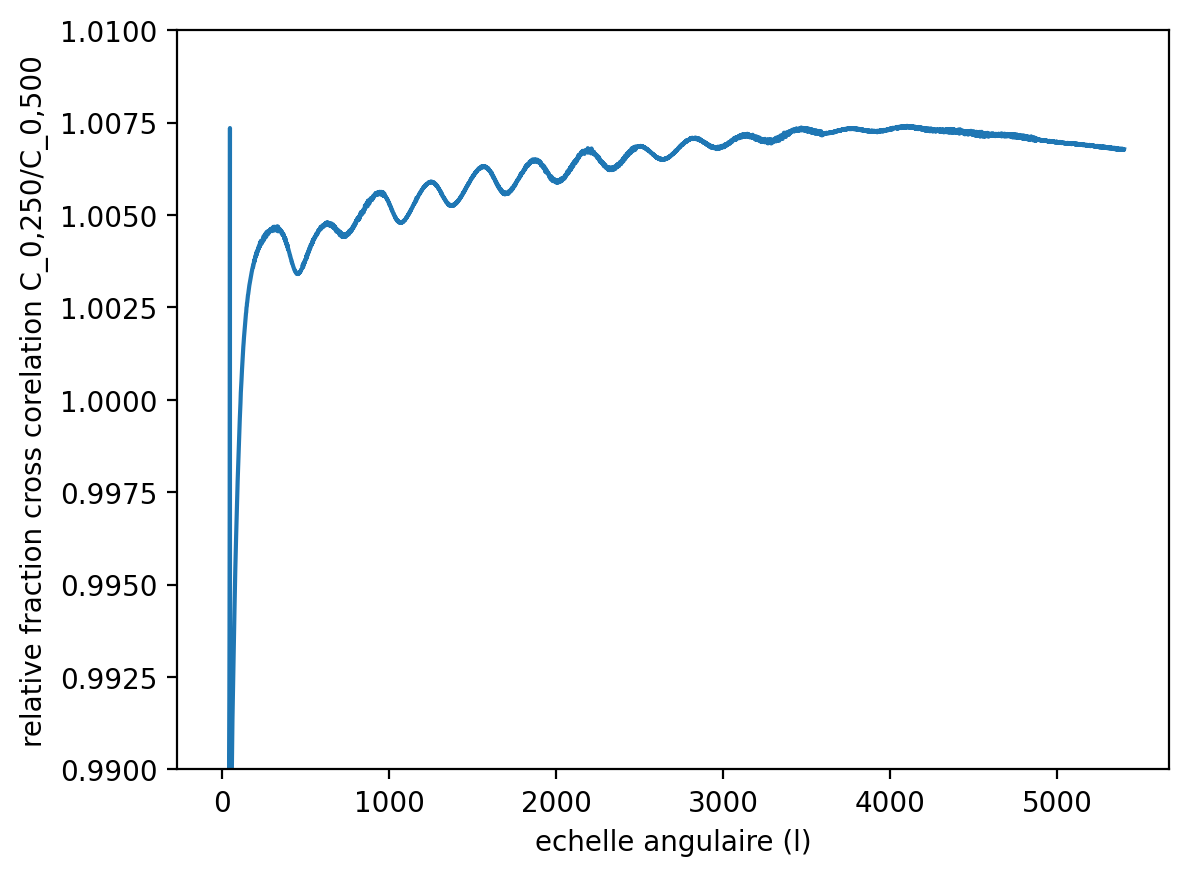

In [12]:
file_path1 = 'test_rayleigh_lensedCls.dat_2_1'
file_path2 = 'test_rayleigh_lensedCls.dat_3_1'

with open(file_path1, 'r') as file:
    content1 = file.read()
#print(content)
liste1 = list(content1.split())

with open(file_path2, 'r') as file:
    content2 = file.read()
#print(content)
liste2 = list(content2.split())

del liste1[0]
del liste2[0]

Dltt1 = []
Dltt2 = []

for i in range(int((len(liste1)+1)/5)):
    Dltt1.append(float(liste1[i*5]))

for i in range(int((len(liste2)+1)/5)):
    Dltt2.append(float(liste2[i*5]))

Relativ_diff = []

for i in range(len(Dltt1)):
    Relativ_diff.append((Dltt1[i]/Dltt2[i])/0.0625)

l = np.arange(2,len(Dltt1)+2)

plt.plot(l,Relativ_diff)
plt.ylabel('relative fraction cross corelation C_0,250/C_0,500')
plt.xlabel('echelle angulaire (l)')
plt.ylim((0.99,1.01))
#plt.xlim((0,100))
plt.savefig('cross_coreelation_fraction250_500')